In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers, models
import tensorflow as tf

In [2]:

path = os.path.join(os.getcwd(), ".data")

X, y = fetch_openml('CIFAR_10', data_home=path, return_X_y=True)

c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3062,a3063,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071
0,26.0,17.0,13.0,13.0,13.0,14.0,14.0,15.0,14.0,10.0,...,250.0,237.0,144.0,33.0,29.0,46.0,28.0,27.0,26.0,27.0
1,94.0,101.0,95.0,94.0,94.0,97.0,111.0,142.0,166.0,154.0,...,149.0,145.0,147.0,150.0,152.0,163.0,174.0,182.0,184.0,155.0
2,183.0,158.0,166.0,167.0,169.0,171.0,163.0,163.0,160.0,161.0,...,186.0,174.0,177.0,227.0,250.0,250.0,250.0,250.0,250.0,250.0
3,255.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,182.0,156.0,156.0,144.0,118.0,132.0,148.0,118.0,136.0,85.0,...,87.0,83.0,83.0,75.0,79.0,72.0,68.0,73.0,67.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,76.0,76.0,77.0,76.0,75.0,76.0,76.0,76.0,76.0,78.0,...,228.0,185.0,177.0,223.0,239.0,239.0,235.0,236.0,234.0,236.0
59996,81.0,91.0,98.0,106.0,108.0,110.0,80.0,84.0,88.0,90.0,...,126.0,107.0,143.0,155.0,156.0,160.0,173.0,129.0,147.0,160.0
59997,20.0,19.0,15.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,...,114.0,112.0,68.0,50.0,52.0,52.0,51.0,50.0,53.0,47.0
59998,25.0,15.0,23.0,17.0,23.0,51.0,74.0,91.0,114.0,137.0,...,87.0,84.0,83.0,84.0,79.0,78.0,78.0,80.0,81.0,80.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

In [5]:
X_train_arr = np.reshape(np.array(X_train), [X_train.shape[0], 3, 32, 32]).transpose(0, 2,3,1) / 255.0
X_test_arr = np.reshape(np.array(X_test), [X_test.shape[0], 3, 32, 32]).transpose(0, 2,3,1) / 255.0

#y_train_arr = to_categorical(np.array(y_train))
#y_test_arr = to_categorical(np.array(y_test))
y_train_arr = np.array(y_train).reshape(y_train.shape[0],1)
y_test_arr = np.array(y_test).reshape(y_test.shape[0],1)

In [6]:
print(X_train_arr.shape)
print(y_train_arr.shape)

(48000, 32, 32, 3)
(48000, 1)


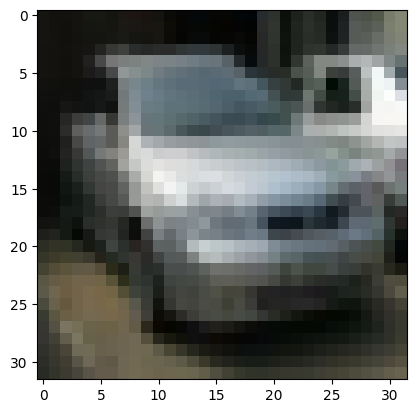

In [7]:
plt.imshow(X_train_arr[3])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_arr, y_train_arr, epochs=10, 
                    validation_data=(X_test_arr, y_test_arr))

Epoch 1/10


c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "C:\Users\takam\.pyenv\pyenv-win\versions\3.8.0\lib\runpy.py", line 192, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\takam\.pyenv\pyenv-win\versions\3.8.0\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\takam\.pyenv\pyenv-win\versions\3.8.0\lib\asyncio\base_events.py", line 563, in run_forever
      self._run_once()
    File "C:\Users\takam\.pyenv\pyenv-win\versions\3.8.0\lib\asyncio\base_events.py", line 1844, in _run_once
      handle._run()
    File "C:\Users\takam\.pyenv\pyenv-win\versions\3.8.0\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\takam\AppData\Local\Temp\ipykernel_23392\4139947209.py", line 5, in <module>
      history = model.fit(X_train_arr, y_train_arr, epochs=10,
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\engine\training.py", line 864, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\engine\training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\engine\compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\keras\metrics.py", line 720, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_866]